In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
pd.set_option('display.max_columns',None)

In [145]:
df = pd.read_csv('Gurgaon_properties_Outlier_treatment.csv')

In [146]:
df.drop(columns='Unnamed: 0',inplace=True)

In [147]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
area_room_ration          0
dtype: int64

### Built up Area

<AxesSubplot:xlabel='built_up_area', ylabel='super_built_up_area'>

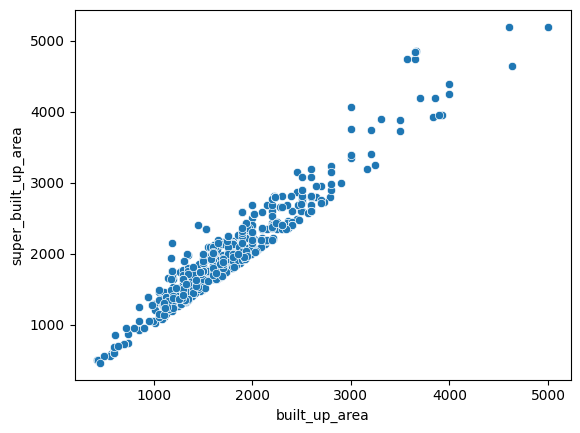

In [148]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

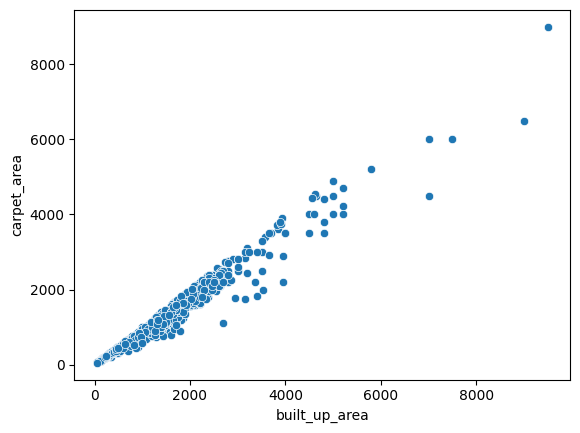

In [149]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [150]:
df[(df['carpet_area'].isnull()) & (df['built_up_area'].isnull()) & (df['super_built_up_area'].isnull())]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, area, areaWithType, bedRoom, bathroom, balcony, floorNum, facing, agePossession, super_built_up_area, built_up_area, carpet_area, servant room, pooja room, study room, others, store room, furnishing_type, luxury_score, area_room_ratio, area_room_ration]
Index: []

In [151]:
all_present_df = df[~((df['carpet_area'].isnull()) | (df['built_up_area'].isnull()) | (df['super_built_up_area'].isnull()))]

In [152]:
all_present_df.shape

(531, 25)

In [153]:
super_to_built_up_area_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [154]:
carpet_to_built_up_area_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [155]:
print(super_to_built_up_area_ratio,carpet_to_built_up_area_ratio)

1.105263157894737 0.9


In [156]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & ~(df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]

In [157]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [158]:
sbc_df

property_type                   society      sector  price  \
2             flat             m3m woodshire  sector 107   0.75   
13            flat            avl 36 gurgaon  sector 36a   0.36   
14            flat         mapsko casa bella   sector 82   0.86   
22            flat    cghs airport apartment   sector 47   1.65   
39            flat               birla navya  sector 63a   3.30   
...            ...                       ...         ...    ...   
3508          flat     alpha corp gurgaonone   sector 84   1.15   
3510          flat  bestech park view ananda   sector 81   1.45   
3519          flat        ireo the corridors  sector 67a   1.62   
3526          flat              corona optus  sector 37c   1.43   
3551          flat   shree vardhman victoria   sector 70   1.65   

      price_per_sqft    area  \
2             5490.0  1366.0   
13            9000.0   400.0   
14            8121.0  1059.0   
22            7857.0  2100.0   
39           15349.0  2150.0   
...              ...     ...   
3508          7497.0  1534.0   
3510          8735.0  1660.0   
3519          9380.0  1727.0   
3526          7186.0  1990.0   
3551          8462.0  1950.0   

                                           areaWithType  bedRoom  bathroom  \
2     Super Built up area 1366(126.91 sq.m.)Carpet a...      2.0       2.0   
13    Super Built up area 406(37.72 sq.m.)Carpet are...      1.0       1.0   
14    Super Built up area 1430(132.85 sq.m.)Carpet a...      3.0       3.0   
22    Super Built up area 2100(195.1 sq.m.)Carpet ar...      3.0       3.0   
39    Super Built up area 2150(199.74 sq.m.)Carpet a...      3.0       3.0   
...                                                 ...      ...       ...   
3508  Super Built up area 1534(142.51 sq.m.)Carpet a...      2.0       2.0   
3510  Super Built up area 1660(154.22 sq.m.)Carpet a...      3.0       2.0   
3519  Super Built up area 1727(160.44 sq.m.)Carpet a...      3.0       3.0   
3526  Super Built up area 1990(184.88 sq.m.)Carpet a...      3.0       3.0   
3551  Super Built up area 1950(181.16 sq.m.)Carpet a...      3.0       5.0   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
2         3+      14.0        West      Relatively New               1366.0   
13         1       7.0        West      Relatively New                406.0   
14         3       5.0       South      Moderately Old               1430.0   
22         3       1.0  North-East        Old Property               2100.0   
39         3       4.0        West  Under Construction               2150.0   
...      ...       ...         ...                 ...                  ...   
3508       3      14.0  South-East      Relatively New               1534.0   
3510      3+       3.0         NaN      Relatively New               1660.0   
3519       2       4.0       North        New Property               1727.0   
3526      3+       2.0       North      Relatively New               1990.0   
3551       3       6.0  North-East      Relatively New               1950.0   

      built_up_area  carpet_area  servant room  pooja room  study room  \
2            1201.0       1050.0           0.0         1.0         0.0   
13            407.0        402.0           0.0         0.0         0.0   
14           1234.0       1056.0           0.0         0.0         1.0   
22           1906.0       1720.0           0.0         0.0         0.0   
39           1640.0       1200.0           1.0         0.0         0.0   
...             ...          ...           ...         ...         ...   
3508         1394.0       1260.0           0.0         0.0         1.0   
3510         1352.0       1082.0           0.0         0.0         0.0   
3519         1346.0       1017.0           0.0         0.0         0.0   
3526         1834.0       1680.0           1.0         0.0         0.0   
3551         1527.0       1161.0           1.0         1.0         0.0   

      others  store room  furnishing_typ

In [159]:
df.update(sbc_df)

In [160]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
area_room_ration          0
dtype: int64

In [161]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]

In [162]:
sb_df

property_type                   society      sector  price  \
0             flat           eldeco accolade  sohna road   0.73   
4             flat             pyramid urban  sector 67a   0.60   
5             flat        mapsko mount ville   sector 79   1.20   
8             flat  emaar mgf the palm drive   sector 66   3.00   
11            flat           the close north   sector 50   2.51   
...            ...                       ...         ...    ...   
3532          flat    conscient heritage max  sector 102   1.82   
3536          flat                sare homes   sector 92   0.95   
3541          flat           kiran residency   sector 56   1.55   
3550          flat    puri diplomatic greens  sector 111   2.25   
3554          flat                chd avenue   sector 71   1.35   

      price_per_sqft    area                            areaWithType  bedRoom  \
0             5753.0  1269.0  Super Built up area 1269(117.89 sq.m.)      2.0   
4             8571.0   700.0    Super Built up area 700(65.03 sq.m.)      2.0   
5             8054.0  1490.0  Super Built up area 1490(138.43 sq.m.)      3.0   
8            14286.0  2100.0   Super Built up area 2100(195.1 sq.m.)      4.0   
11           11992.0  2093.0  Super Built up area 2093(194.45 sq.m.)      3.0   
...              ...     ...                                     ...      ...   
3532          9010.0  2020.0  Super Built up area 1942(180.42 sq.m.)      3.0   
3536          4872.0  1950.0  Super Built up area 1950(181.16 sq.m.)      4.0   
3541          7750.0  2000.0  Super Built up area 2000(185.81 sq.m.)      3.0   
3550         13235.0  1700.0  Super Built up area 1700(157.94 sq.m.)      3.0   
3554          5745.0  2350.0  Super Built up area 2350(218.32 sq.m.)      4.0   

      bathroom balcony  floorNum      facing   agePossession  \
0          2.0       3       9.0  North-East  Relatively New   
4          2.0       2      14.0         NaN    New Property   
5          3.0       3      24.0        West  Relatively New   
8          5.0      3+      10.0        East  Relatively New   
11         3.0       3      11.0  North-East  Moderately Old   
...        ...     ...       ...         ...             ...   
3532       4.0      3+      12.0  North-East  Relatively New   
3536       3.0       3      13.0         NaN    New Property   
3541       3.0       3       5.0       North    Old Property   
3550       3.0       2      12.0  North-East  Relatively New   
3554       4.0       3       8.0  North-West  Moderately Old   

      super_built_up_area  built_up_area  carpet_area  servant room  \
0                  1269.0            NaN          NaN           0.0   
4                   700.0            NaN          NaN           0.0   
5                  1490.0            NaN          NaN           0.0   
8                  2100.0            NaN          NaN           1.0   
11                 2093.0            NaN          NaN           0.0   
...                   ...            ...          ...           ...   
3532               1942.0            NaN          NaN           1.0   
3536               1950.0            NaN          NaN           0.0   
3541               2000.0            NaN          NaN           1.0   
3550               1700.0            NaN          NaN           0.0   
3554               2350.0            NaN          NaN           1.0   

      pooja room  study room  others  store room  furnishing_type  \
0            1.0         0.0     0.0         0.0              0.0   
4            0.0         0.0     0.0         0.0              0.0   
5            0.0         0.0     0.0         0.0              1.0   
8            0.0         0.0     0.0         0.0              1.0   
11           1.0         0.0     0.0         1.0              1.0   
...          ...         ...     ...         ...              ...   
3532         0.0         0.0     0.0         0.0              0.0   
3536         0.0         0.0     0.0         0.0     

In [163]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [164]:
sb_df

property_type                   society      sector  price  \
0             flat           eldeco accolade  sohna road   0.73   
4             flat             pyramid urban  sector 67a   0.60   
5             flat        mapsko mount ville   sector 79   1.20   
8             flat  emaar mgf the palm drive   sector 66   3.00   
11            flat           the close north   sector 50   2.51   
...            ...                       ...         ...    ...   
3532          flat    conscient heritage max  sector 102   1.82   
3536          flat                sare homes   sector 92   0.95   
3541          flat           kiran residency   sector 56   1.55   
3550          flat    puri diplomatic greens  sector 111   2.25   
3554          flat                chd avenue   sector 71   1.35   

      price_per_sqft    area                            areaWithType  bedRoom  \
0             5753.0  1269.0  Super Built up area 1269(117.89 sq.m.)      2.0   
4             8571.0   700.0    Super Built up area 700(65.03 sq.m.)      2.0   
5             8054.0  1490.0  Super Built up area 1490(138.43 sq.m.)      3.0   
8            14286.0  2100.0   Super Built up area 2100(195.1 sq.m.)      4.0   
11           11992.0  2093.0  Super Built up area 2093(194.45 sq.m.)      3.0   
...              ...     ...                                     ...      ...   
3532          9010.0  2020.0  Super Built up area 1942(180.42 sq.m.)      3.0   
3536          4872.0  1950.0  Super Built up area 1950(181.16 sq.m.)      4.0   
3541          7750.0  2000.0  Super Built up area 2000(185.81 sq.m.)      3.0   
3550         13235.0  1700.0  Super Built up area 1700(157.94 sq.m.)      3.0   
3554          5745.0  2350.0  Super Built up area 2350(218.32 sq.m.)      4.0   

      bathroom balcony  floorNum      facing   agePossession  \
0          2.0       3       9.0  North-East  Relatively New   
4          2.0       2      14.0         NaN    New Property   
5          3.0       3      24.0        West  Relatively New   
8          5.0      3+      10.0        East  Relatively New   
11         3.0       3      11.0  North-East  Moderately Old   
...        ...     ...       ...         ...             ...   
3532       4.0      3+      12.0  North-East  Relatively New   
3536       3.0       3      13.0         NaN    New Property   
3541       3.0       3       5.0       North    Old Property   
3550       3.0       2      12.0  North-East  Relatively New   
3554       4.0       3       8.0  North-West  Moderately Old   

      super_built_up_area  built_up_area  carpet_area  servant room  \
0                  1269.0         1148.0          NaN           0.0   
4                   700.0          633.0          NaN           0.0   
5                  1490.0         1348.0          NaN           0.0   
8                  2100.0         1900.0          NaN           1.0   
11                 2093.0         1894.0          NaN           0.0   
...                   ...            ...          ...           ...   
3532               1942.0         1757.0          NaN           1.0   
3536               1950.0         1765.0          NaN           0.0   
3541               2000.0         1810.0          NaN           1.0   
3550               1700.0         1538.0          NaN           0.0   
3554               2350.0         2127.0          NaN           1.0   

      pooja room  study room  others  store room  furnishing_type  \
0            1.0         0.0     0.0         0.0              0.0   
4            0.0         0.0     0.0         0.0              0.0   
5            0.0         0.0     0.0         0.0              1.0   
8            0.0         0.0     0.0         0.0              1.0   
11           1.0         0.0     0.0         1.0              1.0   
...          ...         ...     ...         ...              ...   
3532         0.0         0.0     0.0         0.0              0.0   
3536         0.0         0.0     0.0         0.0     

In [165]:
df.update(sb_df)

In [166]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
area_room_ration          0
dtype: int64

In [167]:
c_df = df[(df['super_built_up_area'].isnull()) & ~(df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]

In [168]:
c_df.head()

property_type                  society      sector  price  price_per_sqft  \
12          flat               sare homes   sector 92   0.80          4695.0   
24          flat              the serenas   sector 36   0.42          7910.0   
29          flat       godrej nature plus   sector 33   1.55          9955.0   
30          flat  signature global solera  sector 107   0.36          6581.0   
33          flat          cghs rail vihar   sector 15   1.40         10769.0   

      area                      areaWithType  bedRoom  bathroom balcony  \
12  1704.0  Carpet area: 1704 (158.31 sq.m.)      4.0       4.0       3   
24   531.0    Carpet area: 531 (49.33 sq.m.)      2.0       2.0       1   
29  1557.0  Carpet area: 1557 (144.65 sq.m.)      3.0       2.0      3+   
30   547.0    Carpet area: 547 (50.82 sq.m.)      2.0       2.0       2   
33  1300.0  Carpet area: 1300 (120.77 sq.m.)      4.0       3.0       3   

    floorNum      facing   agePossession  super_built_up_area  built_up_area  \
12       1.0  North-East  Moderately Old                  NaN            NaN   
24       3.0         NaN       Undefined                  NaN            NaN   
29       8.0        East    New Property                  NaN            NaN   
30       8.0  South-East  Relatively New                  NaN            NaN   
33       3.0        East    Old Property                  NaN            NaN   

    carpet_area  servant room  pooja room  study room  others  store room  \
12       1704.0           0.0         0.0         0.0     0.0         0.0   
24        531.0           0.0         0.0         0.0     0.0         0.0   
29       1557.0           0.0         0.0         0.0     0.0         0.0   
30        547.0           0.0         0.0         0.0     0.0         0.0   
33       1300.0           0.0         0.0         0.0     0.0         0.0   

    furnishing_type  luxury_score  area_room_ratio  area_room_ration  
12              0.0          90.0            426.0             426.0  
24              0.0           0.0            265.5             265.5  
29              0.0          47.0            519.0             519.0  
30              0.0          58.0            273.5             273.5  
33              1.0         101.0            325.0             325.0

In [169]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [170]:
df.update(c_df)

In [171]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
servant room              0
pooja room                0
study room                0
others                    0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
area_room_ration          0
dtype: int64

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

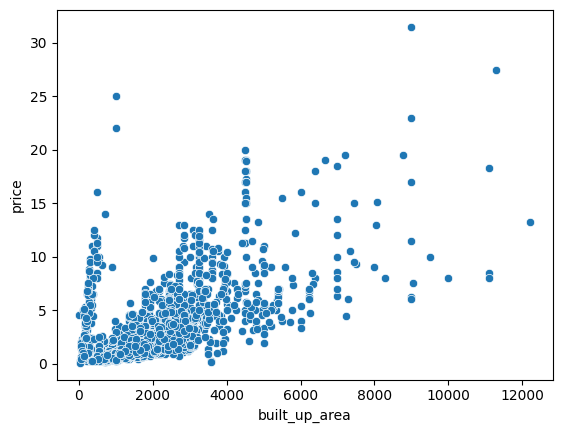

In [172]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [173]:
anomalies_df = df[(df['built_up_area']<2000) & (df['price']>2.5)]

In [174]:
anomalies_df['built_up_area'] = anomalies_df['area']

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
df.update(anomalies_df)

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

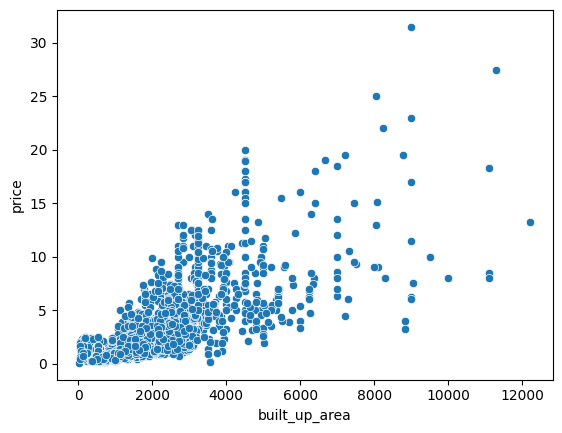

In [176]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [177]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5753.0   
1          flat        dlf regal gardens   sector 90   1.29          9021.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

     area                                       areaWithType  bedRoom  \
0  1269.0             Super Built up area 1269(117.89 sq.m.)      2.0   
1  1430.0  Super Built up area 1702(158.12 sq.m.)Built Up...      3.0   
2  1366.0  Super Built up area 1366(126.91 sq.m.)Carpet a...      2.0   
3  3198.0  Super Built up area 3198(297.1 sq.m.)Built Up ...      4.0   
4   700.0               Super Built up area 700(65.03 sq.m.)      2.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       2.0       3       9.0  North-East  Relatively New   
1       3.0       3       7.0        East  Relatively New   
2       2.0      3+      14.0        West  Relatively New   
3       5.0      3+      10.0  North-East  Relatively New   
4       2.0       2      14.0         NaN    New Property   

   super_built_up_area  built_up_area  carpet_area  servant room  pooja room  \
0               1269.0         1148.0          NaN           0.0         1.0   
1               1702.0         1540.0       1430.0           0.0         0.0   
2               1366.0         1201.0       1050.0           0.0         1.0   
3               3198.0         2600.0       2350.0           1.0         1.0   
4                700.0          633.0          NaN           0.0         0.0   

   study room  others  store room  furnishing_type  luxury_score  \
0         0.0     0.0         0.0              0.0         133.0   
1         1.0     0.0         0.0              0.0         224.0   
2         0.0     0.0         0.0              0.0         228.0   
3         0.0     0.0         0.0              1.0         228.0   
4         0.0     0.0         0.0              0.0          19.0   

   area_room_ratio  area_room_ration  
0       634.500000        634.500000  
1       476.666667        476.666667  
2       683.000000        683.000000  
3       799.500000        799.500000  
4       350.000000        350.000000

In [178]:
df.drop(columns=['area','super_built_up_area','carpet_area','area_room_ration','areaWithType'],axis=1,inplace=True)

In [179]:
df.shape

(3555, 20)

In [180]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
servant room          0
pooja room            0
study room            0
others                0
store room            0
furnishing_type       0
luxury_score          0
area_room_ratio       0
dtype: int64

In [181]:
df[df['floorNum'].isnull()]

property_type                  society             sector  price  \
391          house              independent           sector 2   5.60   
404          house  ansal sushant lok plots          sector 43   3.30   
436          house     dlf new town heights          sector 86   2.47   
639          house              independent          sector 26   4.60   
929          house              independent           sector 4   0.65   
952           flat       experion heartsong  dwarka expressway   1.08   
1375         house              independent          sector 24   1.45   
1388         house       vipul tatvam villa          sector 48   8.50   
1648         house       vipul tatvam villa          sector 48   8.50   
2251         house               jacob pura          sector 12   0.35   
2441         house              independent           sector 3   1.50   
2504         house              independent          sector 25  13.00   
2527         house        ansal sushant lok          sector 43  10.50   
2844         house              independent           sector 4   4.12   
2849          flat                      NaN          sector 78   0.60   
3337         house       emaar mgf marbella          sector 66   9.00   
3467         house              independent           sector 7   6.50   

      price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
391          17284.0      8.0       6.0      3+       NaN  South-West   
404          26570.0      1.0       1.0       0       NaN         NaN   
436           7719.0      4.0       4.0      3+       NaN        West   
639          12198.0      4.0       4.0      3+       NaN         NaN   
929          11111.0      4.0       2.0       2       NaN         NaN   
952           6150.0      3.0       3.0      No       NaN         NaN   
1375          2984.0      3.0       3.0       1       NaN         NaN   
1388         26235.0      4.0       4.0       1       NaN         NaN   
1648         26235.0      4.0       4.0       2       NaN        East   
2251          9722.0      2.0       1.0       0       NaN         NaN   
2441         10288.0      3.0       3.0       0       NaN         NaN   
2504         45710.0      6.0       8.0      3+       NaN         NaN   
2527         27911.0      4.0       4.0       2       NaN  North-East   
2844          8889.0      2.0       1.0      3+       NaN         NaN   
2849          3692.0      2.0       2.0      No       NaN         NaN   
3337         21251.0      4.0       4.0      3+       NaN  South-West   
3467         15046.0      3.0       2.0      3+       NaN         NaN   

           agePossession  built_up_area  servant room  pooja room  study room  \
391       Moderately Old         3240.0           1.0         1.0         1.0   
404   Under Construction         1242.0           0.0         0.0         0.0   
436       Moderately Old         2800.0           1.0         1.0         0.0   
639         Old Property         3771.0           0.0         0.0         0.0   
929       Moderately Old          585.0           0.0         0.0         0.0   
952   Under Construction         1758.0           0.0         0.0         0.0   
1375        Old Property          540.0           0.0         0.0         0.0   
1388      Relatively New         3240.0           0.0         0.0         0.0   
1648      Moderately Old         3240.0           1.0         1.0         0.0   
2251        Old Property          360.0           0.0         0.0         0.0   
2441        Old Property          210.0           0.0         0.0         0.0   
2504      Relatively New         2844.0           1.0         1.0         1.0   
2527        Old Property         3762.0           1.0         0.0         0.0   
2844      Moderately Old         4635.0           0.0         0.0         0.0   
2849  Under Construction         1625.0           0.0         0.0         0.0   
3337      Relatively New         5200.0           1.0         1.0         0.0  

In [182]:
df[df['property_type']=='house']['floorNum'].median()

2.0

In [183]:
df['floorNum'].fillna(2.0,inplace=True)

In [184]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
servant room          0
pooja room            0
study room            0
others                0
store room            0
furnishing_type       0
luxury_score          0
area_room_ratio       0
dtype: int64

### Facing

<AxesSubplot:ylabel='facing'>

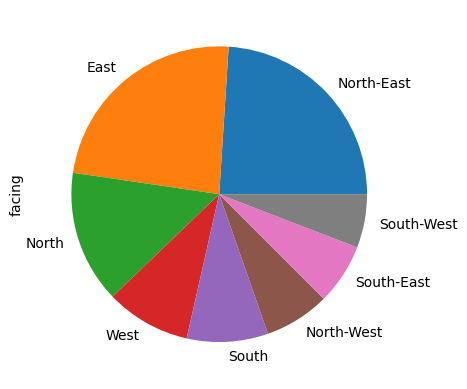

In [185]:
df['facing'].value_counts().plot(kind='pie')

In [186]:
df.drop(columns='facing',axis=1,inplace=True)

In [187]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
pooja room         0
study room         0
others             0
store room         0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

### Society

In [188]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft  bedRoom  \
2849          flat     NaN  sector 78    0.6          3692.0      2.0   

      bathroom balcony  floorNum       agePossession  built_up_area  \
2849       2.0      No       2.0  Under Construction         1625.0   

      servant room  pooja room  study room  others  store room  \
2849           0.0         0.0         0.0     0.0         0.0   

      furnishing_type  luxury_score  area_room_ratio  
2849              0.0           0.0            812.5

In [189]:
df.drop(index=[2849],axis=0,inplace=True)

In [190]:
df[df['society'].isnull()]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, bedRoom, bathroom, balcony, floorNum, agePossession, built_up_area, servant room, pooja room, study room, others, store room, furnishing_type, luxury_score, area_room_ratio]
Index: []

In [191]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
pooja room         0
study room         0
others             0
store room         0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

In [192]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: agePossession, dtype: int64

In [193]:
df[df['agePossession']=='Undefined']

property_type                         society      sector  price  \
18            flat                    tulip orange   sector 70   1.10   
20            flat                smart world gems   sector 89   1.10   
24            flat                     the serenas   sector 36   0.42   
43           house                     independent   sector 17   3.50   
55            flat  ramson kshitij sec-95 gurugram   sector 95   0.27   
...            ...                             ...         ...    ...   
3511          flat            shree vardhman flora   sector 90   0.80   
3524         house                     independent   sector 24  10.00   
3537          flat                    tulip petals   sector 89   1.10   
3542          flat                  aardhya homesh  sector 67a   1.85   
3552         house                     independent   sector 69   0.80   

      price_per_sqft  bedRoom  bathroom balcony  floorNum agePossession  \
18            8148.0      3.0       2.0       2       5.0     Undefined   
20            9973.0      3.0       1.0      No       0.0     Undefined   
24            7910.0      2.0       2.0       1       3.0     Undefined   
43           24306.0      2.0       6.0      3+       3.0     Undefined   
55            2700.0      2.0       2.0      No       1.0     Undefined   
...              ...      ...       ...     ...       ...           ...   
3511          5926.0      2.0       3.0       2       0.0     Undefined   
3524         25543.0      8.0      10.0      3+       1.0     Undefined   
3537          7097.0      3.0       2.0       3       4.0     Undefined   
3542          8043.0      4.0       4.0      No       4.0     Undefined   
3552         10485.0      1.0       1.0       0       1.0     Undefined   

      built_up_area  servant room  pooja room  study room  others  store room  \
18           1350.0           0.0         0.0         0.0     0.0         0.0   
20           1103.0           0.0         0.0         0.0     0.0         0.0   
24            590.0           0.0         0.0         0.0     0.0         0.0   
43           1440.0           0.0         0.0         0.0     0.0         0.0   
55            758.0           0.0         0.0         0.0     0.0         0.0   
...             ...           ...         ...         ...     ...         ...   
3511         1350.0           0.0         0.0         0.0     0.0         0.0   
3524         3915.0           0.0         0.0         0.0     0.0         0.0   
3537         1550.0           0.0         0.0         0.0     0.0         0.0   
3542         2556.0           0.0         0.0         0.0     0.0         0.0   
3552          763.0           0.0         0.0         0.0     0.0         0.0   

      furnishing_type  luxury_score  area_room_ratio  
18                0.0           0.0       450.000000  
20                0.0          65.0       367.666667  
24                0.0           0.0       265.500000  
43                0.0           0.0       240.000000  
55                0.0           0.0       500.000000  
...               ...           ...              ...  
3511              0.0          69.0       675.000000  
3524              0.0           0.0       489.375000  
3537              0.0           0.0       516.666667  
3542              0.0           0.0       575.000000  
3552              0.0           0.0       763.000000  

[291 rows x 19 columns]

In [194]:
def def_imputation(row):
    if row['agePossession'] == 'Undefined':
        val = df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
        if not val.empty:
            return val.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [195]:
df['agePossession'] = df.apply(def_imputation,axis=1)

In [196]:
df['agePossession']

0       Relatively New
1       Relatively New
2       Relatively New
3       Relatively New
4         New Property
             ...      
3550    Relatively New
3551    Relatively New
3552      New Property
3553      New Property
3554    Moderately Old
Name: agePossession, Length: 3554, dtype: object

In [197]:
df['agePossession'].value_counts()

Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: agePossession, dtype: int64

In [198]:
def def_imputation1(row):
    if row['agePossession'] == 'Undefined':
        val = df[(df['sector']==row['sector'])]['agePossession'].mode()
        if not val.empty:
            return val.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [199]:
df['agePossession'] = df.apply(def_imputation1,axis=1)

In [200]:
df['agePossession'].value_counts()

Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: agePossession, dtype: int64

In [201]:
def def_imputation2(row):
    if row['agePossession'] == 'Undefined':
        val = df[(df['property_type']==row['property_type'])]['agePossession'].mode()
        if not val.empty:
            return val.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [202]:
df['agePossession'] = df.apply(def_imputation2,axis=1)

In [203]:
df['agePossession'].value_counts()

Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: agePossession, dtype: int64

In [204]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
pooja room         0
study room         0
others             0
store room         0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

In [205]:
df.to_csv('Gurgaon_properties_missing_value_imputation.csv',index=False)

In [206]:
df.shape

(3554, 19)

In [207]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'servant room', 'pooja room', 'study room', 'others',
       'store room', 'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [208]:
df.drop(columns='area_room_ratio',axis=1,inplace=True)

In [209]:
df.to_csv('Gurgaon_properties_missing_value_imputation.csv',index=False)